In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
cars_data = pd.read_csv('/home/genkibaskervillge/Documents/cars/data.csv')
cars_data.head

<bound method NDFrame.head of       accelerationTime                bodyType   brand cargoVolume curbWeight  \
0                  6,8      3-doors, hatchback    Audi  270-1020 l    1375 kg   
1                  7,8  5-doors, station wagon    Audi  565-1680 l    1745 kg   
2                  9,2  5-doors, station wagon   Honda  624-1668 l    1188 kg   
3                  9,5  5-doors, station wagon    Audi  565-1680 l    1685 kg   
4                  7,0  5-doors, station wagon    Audi  565-1680 l    1680 kg   
...                ...                     ...     ...         ...        ...   
75990              9,5          4-doors, sedan  Subaru       486 l    1395 kg   
75991             11,1          4-doors, sedan  Subaru       486 l    1435 kg   
75992             10,3          4-doors, sedan  Subaru       486 l    1452 kg   
75993              9,5          4-doors, sedan  Subaru       486 l    1395 kg   
75994             11,1          4-doors, sedan  Subaru       486 l    1435 kg  

In [3]:
cars_data.describe()

,modelDate,numberOfAxles,numberOfDoors,trailerWeight,vEenginePower,weight
count,75995.000000,75995.0,75995.000000,0.0,75946.000000,0.0
mean,2004.557063,2.0,4.281742,NaN,108.589919,NaN
std,9.329384,0.0,0.960881,NaN,54.403769,NaN
min,1969.000000,2.0,2.000000,NaN,12.000000,NaN
25%,1999.000000,2.0,4.000000,NaN,75.000000,NaN
50%,2007.000000,2.0,5.000000,NaN,99.000000,NaN
75%,2012.000000,2.0,5.000000,NaN,128.000000,NaN
max,2019.000000,2.0,5.000000,NaN,882.000000,NaN


In [5]:
cars_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75995 entries, 0 to 75994
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   accelerationTime         75995 non-null  object 
 1   bodyType                 75995 non-null  object 
 2   brand                    75995 non-null  object 
 3   cargoVolume              75995 non-null  object 
 4   curbWeight               75995 non-null  object 
 5   driveWheelConfiguration  75995 non-null  object 
 6   eLabel                   61841 non-null  object 
 7   emissionsCO2             75995 non-null  object 
 8   engineCapacity           75861 non-null  object 
 9   fuelCapacity             75861 non-null  object 
 10  fuelConsumption          75861 non-null  object 
 11  fuelType                 75858 non-null  object 
 12  height                   75995 non-null  object 
 13  length                   75995 non-null  object 
 14  model                 

In [7]:
cars_data.nunique()

accelerationTime             228
bodyType                      32
brand                         89
cargoVolume                 1845
curbWeight                  1600
driveWheelConfiguration        3
eLabel                         7
emissionsCO2                 383
engineCapacity               769
fuelCapacity                  98
fuelConsumption              195
fuelType                       9
height                       646
length                      1230
model                       1605
modelDate                     51
name                       60546
numberOfAxles                  1
numberOfDoors                  4
numberOfForwardGears           9
payload                      825
price                      26126
roofLoad                      39
seatingCapacity               22
speed                        226
torque                       474
trailerWeight                  0
url                        75995
vEengineDisplacement         769
vEenginePower                369
vEengineTy

In [8]:
# See if there is any null in our data
null_info = pd.DataFrame({'Null count': cars_data.isnull().sum(), 'Null ratio': cars_data.isnull().sum()/len(cars_data)})
null_info.sort_values(by='Null ratio', ascending=False, inplace=True)
null_info

,Null count,Null ratio
weight,75995,1.000000
trailerWeight,75995,1.000000
eLabel,14154,0.186249
vEfuelType,137,0.001803
fuelType,137,0.001803
fuelConsumption,134,0.001763
engineCapacity,134,0.001763
fuelCapacity,134,0.001763
vEengineDisplacement,134,0.001763
vEenginePower,49,0.000645


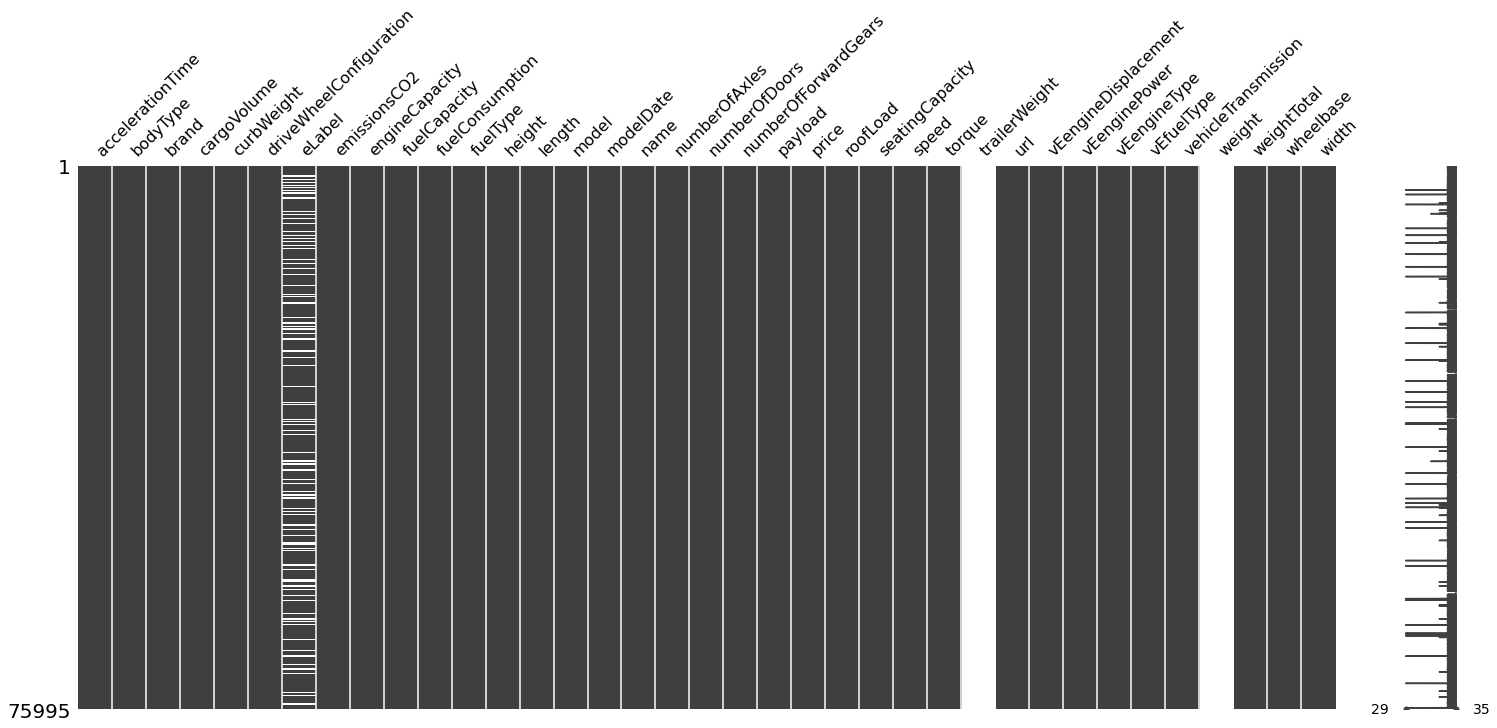

In [9]:
# visualize missing data
import missingno as msno

msno.matrix(cars_data);

In [2]:
cars2 = pd.read_csv("/home/genkibaskervillge/Documents/cars/cars_final_v2.csv")

In [9]:
cars2['length'].value_counts() # ko co - , ko co Nan

4628    740
4720    671
4520    496
4703    480
4239    434
       ... 
5350      1
3888      1
3524      1
3932      1
4019      1
Name: length, Length: 1230, dtype: int64

In [8]:
cars2['length'] = pd.Series(list(map(lambda x: x.split(" ")[0], cars2['length'].to_list())))

In [10]:
cars2.columns

Index(['accelerationTime', 'bodyType', 'brand', 'cargoVolume', 'curbWeight',
       'driveWheelConfiguration', 'eLabel', 'emissionsCO2', 'engineCapacity',
       'fuelCapacity', 'fuelConsumption', 'fuelType', 'height', 'length',
       'model', 'modelDate', 'numberOfDoors', 'numberOfForwardGears',
       'payload', 'price', 'roofLoad', 'seatingCapacity', 'speed', 'torque',
       'vEengineDisplacement', 'vEenginePower', 'vEengineType', 'vEfuelType',
       'vehicleTransmission', 'weightTotal', 'wheelbase', 'width'],
      dtype='object')

In [32]:
cars2.to_csv("cars_manh.csv")

In [13]:
cars2['modelDate'].value_counts()  # ko co Nan, dang int nen ko them xu li

2013    5015
2008    4285
2010    3996
2011    3736
2007    3567
2012    3463
2005    3385
2004    3174
2014    2981
2015    2876
2009    2841
2003    2841
2002    2285
2006    2258
2001    2202
2017    2091
1999    2061
2016    2045
1998    1983
2000    1911
1997    1535
1996    1457
1994    1415
1995    1184
2018    1015
1986     902
1985     867
1993     867
1991     792
1989     791
1992     756
1984     722
1988     651
1983     593
2019     516
1982     461
1987     458
1990     439
1981     414
1979     348
1980     294
1977     148
1978     140
1975      87
1976      82
1974      30
1972      15
1971       8
1973       7
1970       3
1969       2
Name: modelDate, dtype: int64

In [17]:
cars2['numberOfForwardGears'].value_counts(dropna=False)  # xuat hien ki tu dac biet 't' thay bang nan

5      30402
6      25729
4       7924
7       5242
8       3179
NaN     1969
9        842
3        703
0          5
Name: numberOfForwardGears, dtype: int64

In [15]:
cars2['numberOfForwardGears'] = pd.Series(cars2['numberOfForwardGears'].replace("t", np.nan))

In [23]:
cars2['roofLoad'].value_counts(dropna=False)  # xuat hien ki tu dac biet '-'

75     24759
100    21791
NaN    11222
50      5806
80      4967
90      1408
70      1357
60       987
0        837
65       813
150      589
200      262
68       195
85       123
55       116
40        98
300       92
35        89
30        87
45        75
78        43
72        41
210       37
25        28
140       25
170       24
103       24
37        21
20        16
57        13
280       12
34        10
74        10
48         6
120        6
454        2
81         2
550        1
475        1
Name: roofLoad, dtype: int64

In [22]:
cars2['roofLoad'] = pd.Series(cars2['roofLoad'].replace("-", np.nan))

In [27]:
cars2['vEengineDisplacement'].value_counts(dropna=False) # dang int, 134 Nan -> ko xu li them

1598    5659
1998    3618
1968    2981
1995    2526
1997    2437
        ... 
3431       1
3471       1
3746       1
4698       1
3535       1
Name: vEengineDisplacement, Length: 770, dtype: int64

In [30]:
len(cars2[cars2['vEengineDisplacement'] == " "])

0

In [31]:
cars2['vEenginePower'].value_counts(dropna=False)  # dang int, ko co du lieu thieu

110.0    4748
66.0     3237
85.0     3090
103.0    2740
55.0     2323
         ... 
376.0       1
465.0       1
341.0       1
477.0       1
352.0       1
Name: vEenginePower, Length: 370, dtype: int64